In [79]:
from random import randint
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image
import math

In [80]:
#Put noise on img
img = cv2.imread('input/1.jpg',0)
row,col = img.shape

for i in range(7000):
    random_x = randint(0,row-1)
    random_y = randint(0,col-1)
    noises = randint(0,255)
    img[random_x,random_y] = noises
    
    
cv2.imwrite('output/salt_pepper_img.jpg',img)

True

In [81]:
#Decrease noises of an img
img = cv2.imread('output/salt_pepper_img.jpg',0)
result = np.zeros(img.shape)

rows , cols = img.shape

for i in range (1,rows-1):
    for j in range(1,cols-1):
        small_img = img[i-1:i+2, j-1:j+2]
        small_img_1d = small_img.reshape(9)
        sorted_small_img_1d = np.sort(small_img_1d)
        result[i,j] = sorted_small_img_1d[4]
        
cv2.imwrite('output/img_without_noise.jpg',result)

True

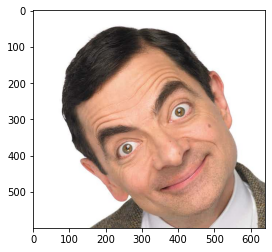

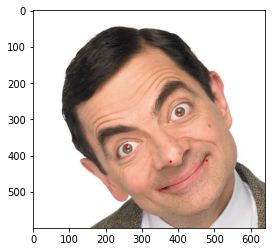

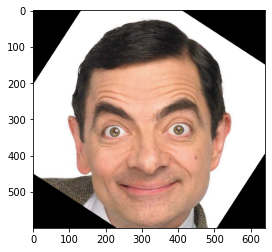

In [95]:
#Change eyes alignment

img = plt.imread('input/1.jpg')
plt.imshow(img)
plt.show()

face_detector = MTCNN()
results = face_detector.detect_faces(img)

def draw_facebox_and_keypoints(result_list):
    data = plt.imread('input/1.jpg')
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        for key, value in result['keypoints'].items():
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    plt.show()
    
draw_facebox_and_keypoints(results)

def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

def alignment_procedure(img, left_eye, right_eye):
    
    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    return img 

detection = results[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(img, left_eye, right_eye)
cv2.imwrite('output/rotated_img.jpg',cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)